In [1]:
#conda remove scikit-learn

In [2]:
#conda install scikit-learn=1.2.2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [4]:
glass_data=pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Exploratory Data Analysis

In [5]:
glass_data.shape

(214, 10)

In [6]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

##### No null values present in the dataset

In [7]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

#### All features are of numerical datatypes

In [8]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


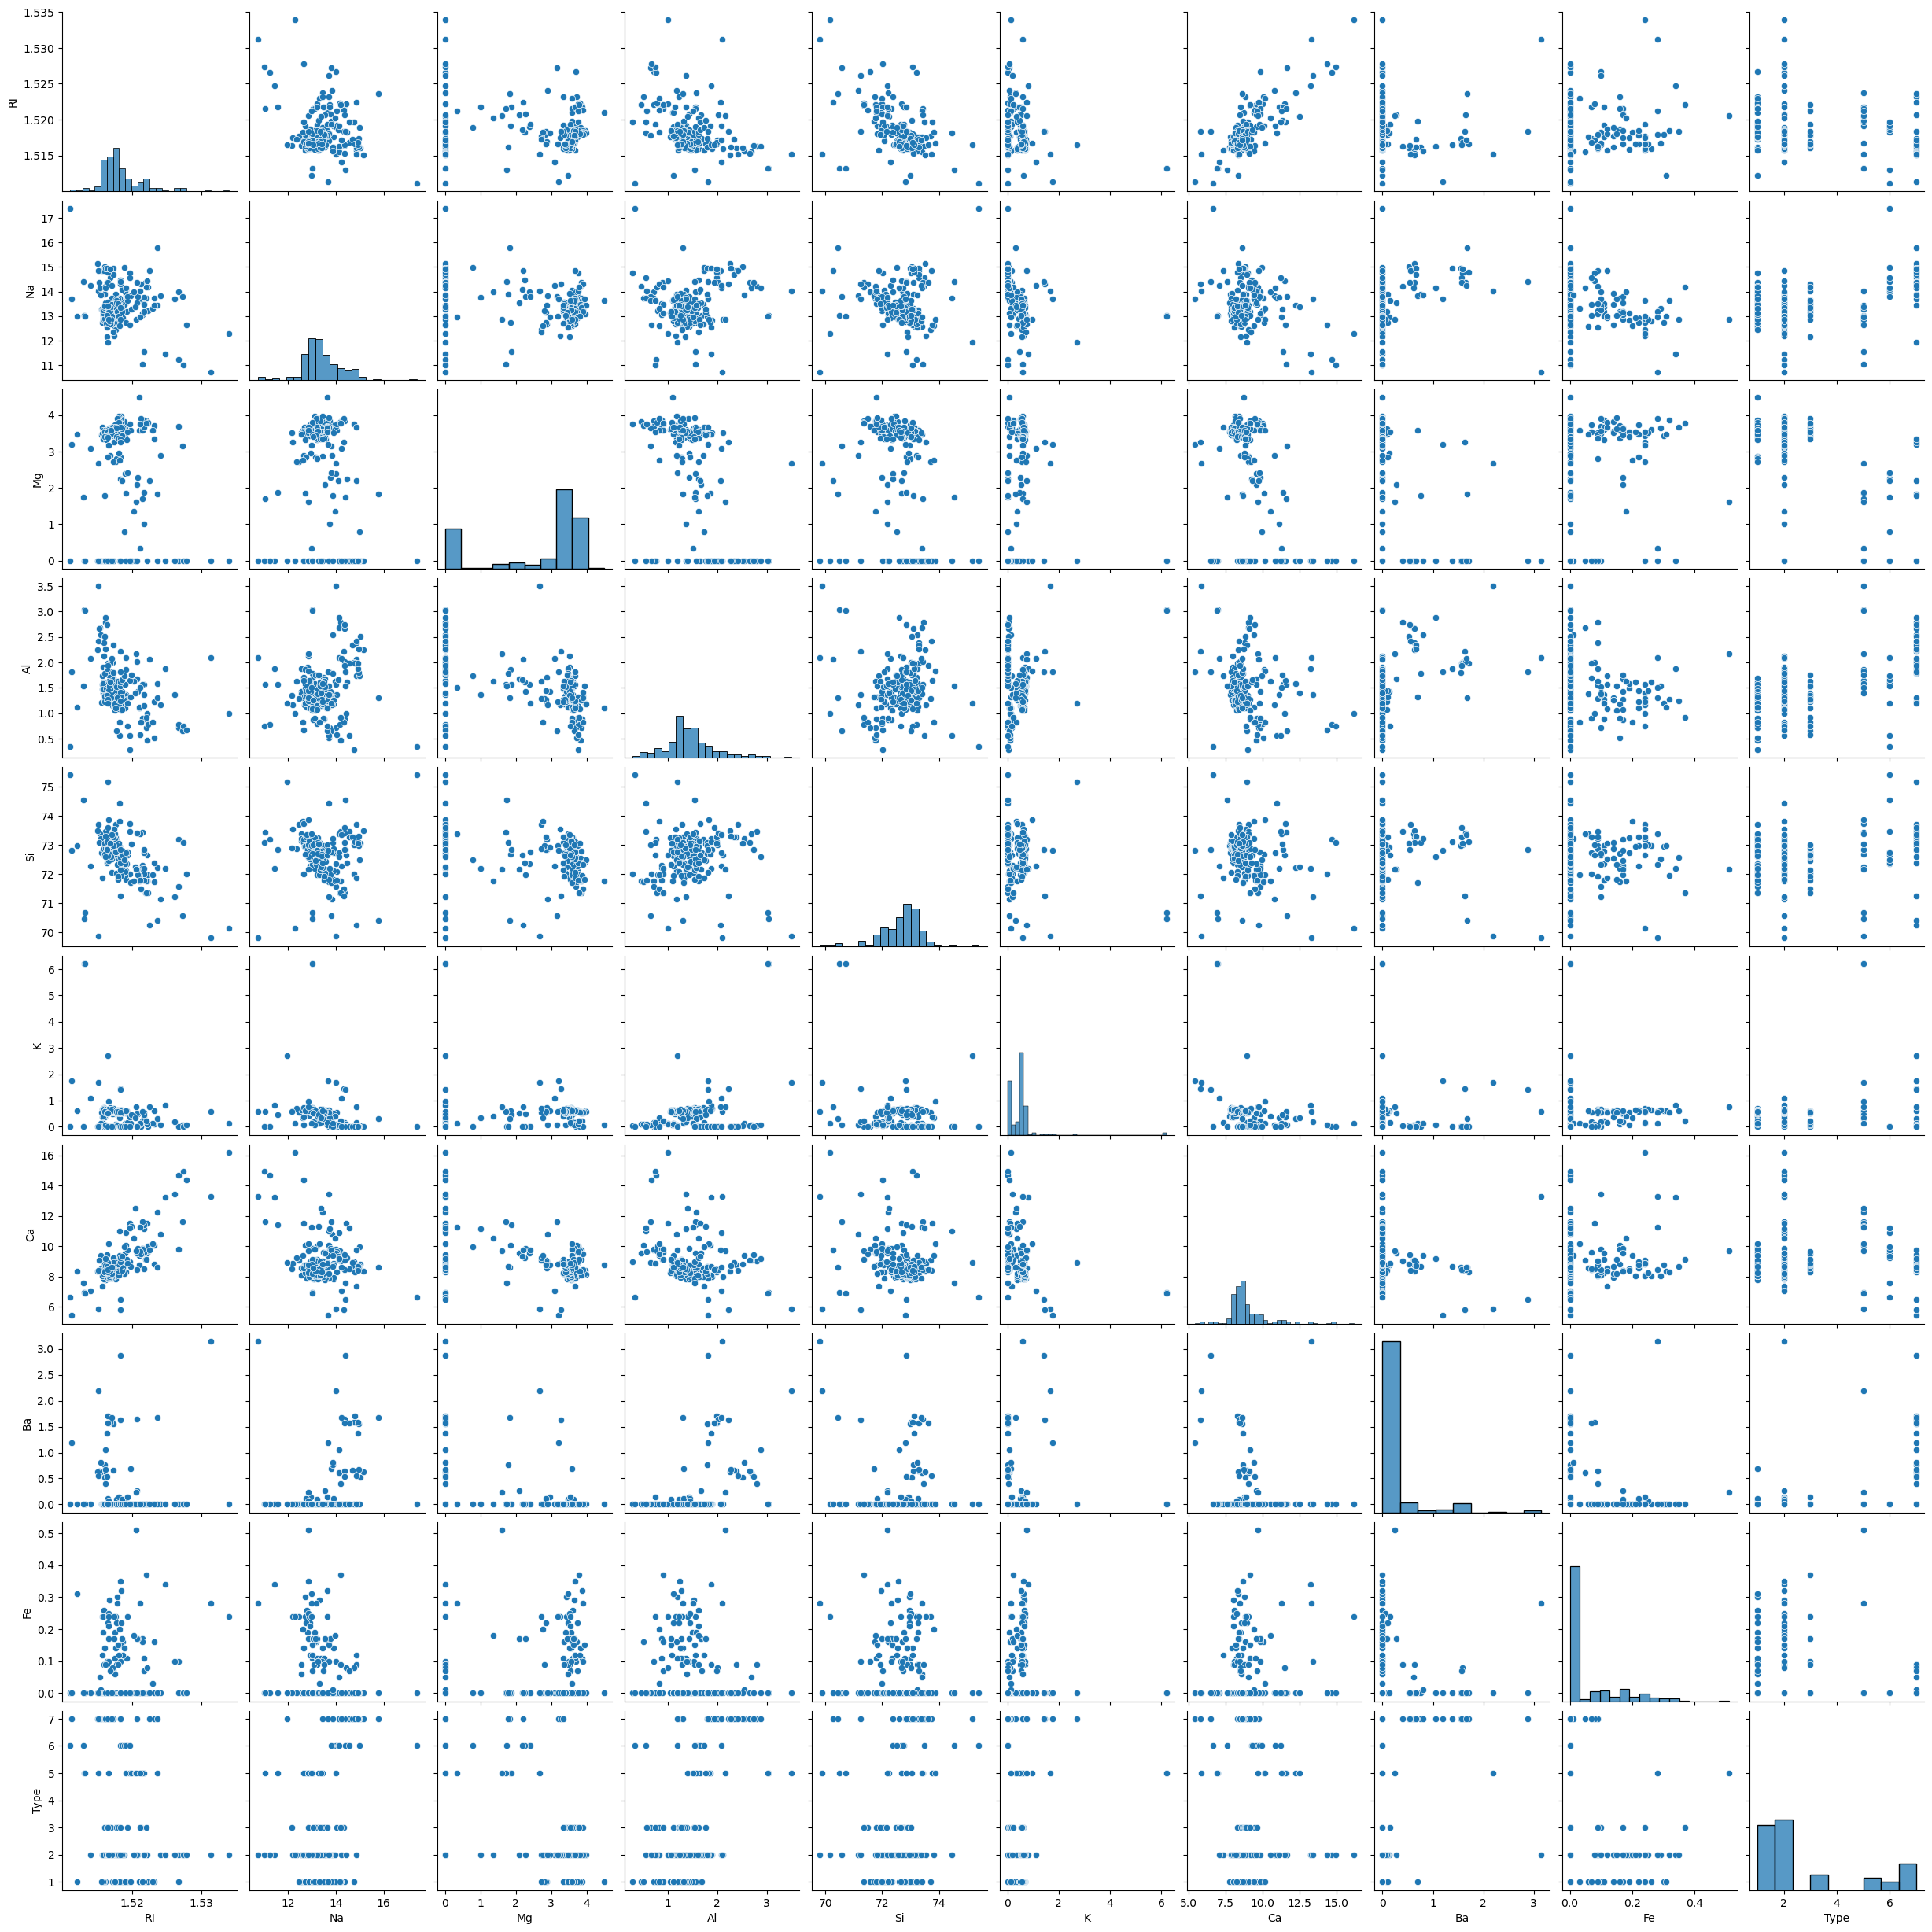

In [10]:
sns.pairplot(glass_data)
plt.show()

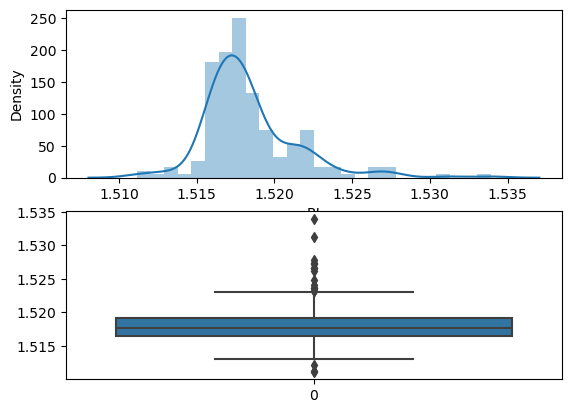

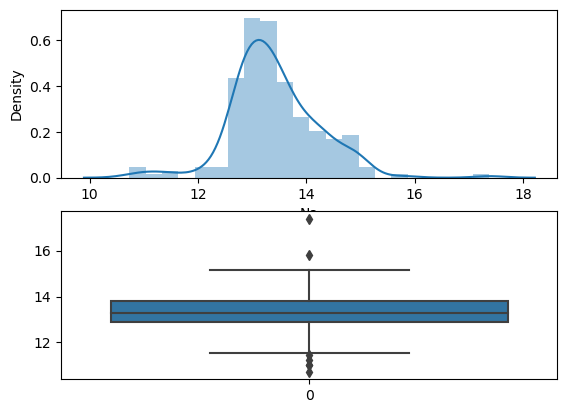

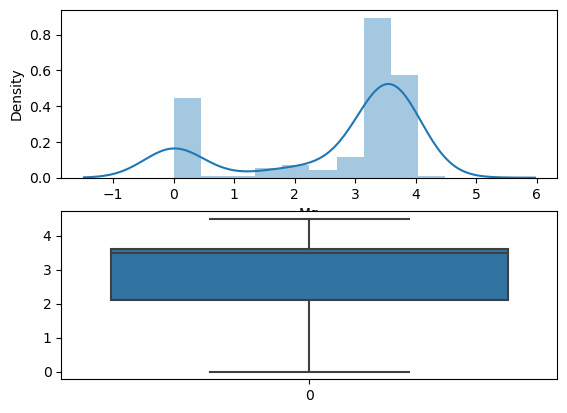

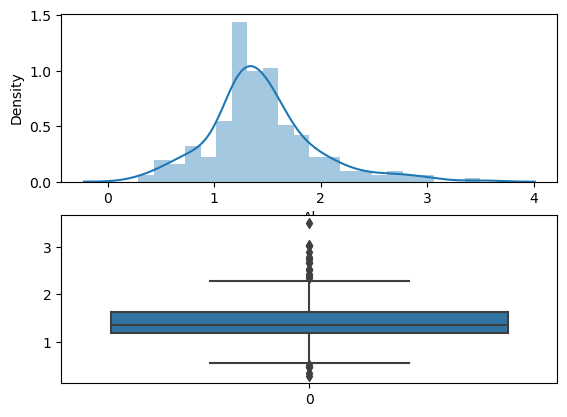

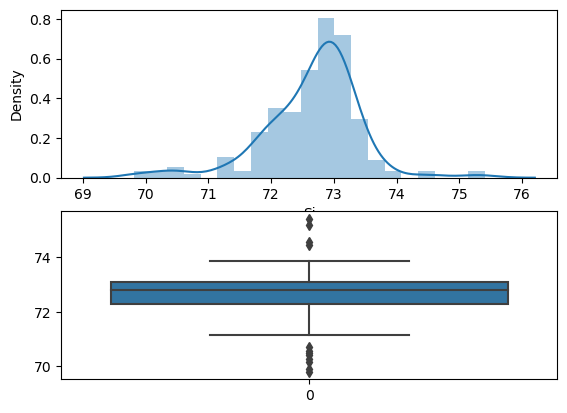

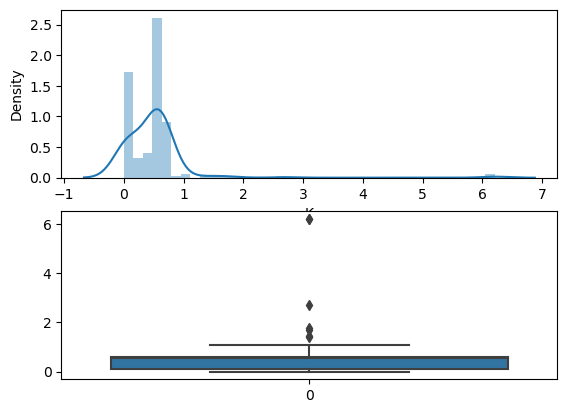

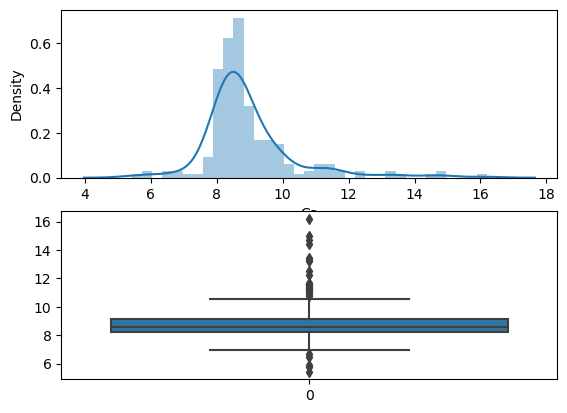

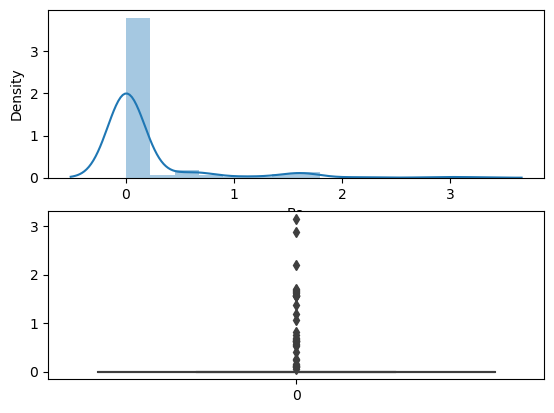

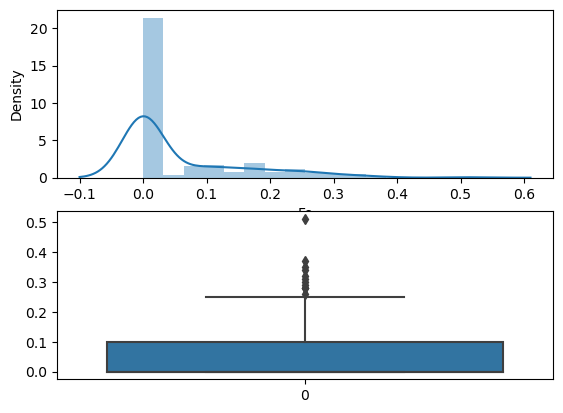

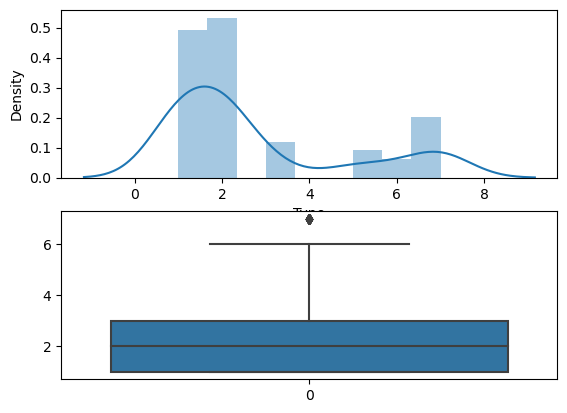

In [11]:
for i in glass_data.columns:
    plt.subplot(2,1,1)    
    sns.distplot(glass_data[i])
    plt.subplot(2,1,2)    
    sns.boxplot(glass_data[i])
    plt.show()

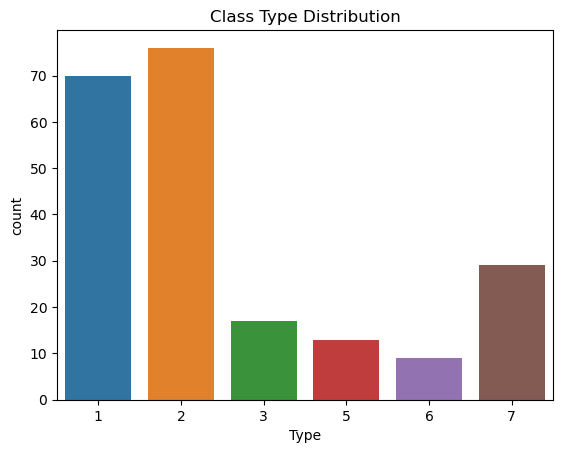

In [12]:
sns.countplot(x=glass_data['Type'])
plt.title('Class Type Distribution')
plt.show()

#### Type 1 and 2 makes the major portion of Type class in dataframe with count of 70 & 75 approx.

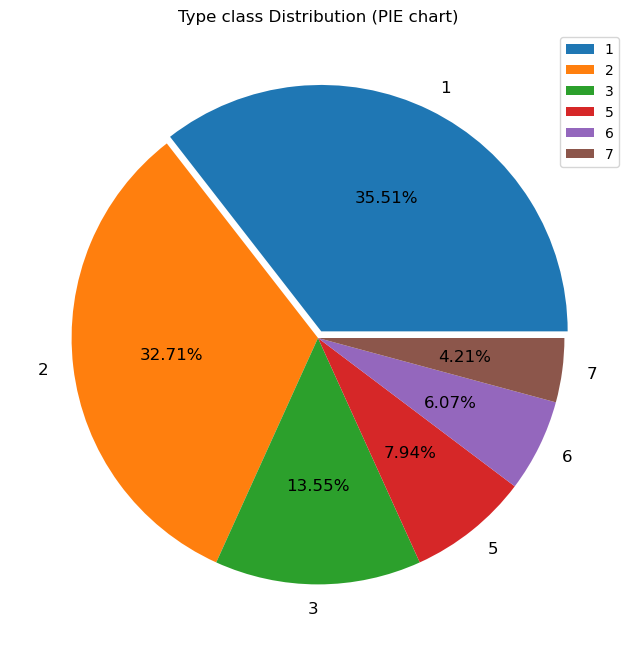

In [13]:
plt.figure(figsize=(8,8))
plt.pie(glass_data['Type'].value_counts(),labels=glass_data.Type.unique(),explode=[0.03,0.0,0.0,0.0,0.0,0.0],autopct='%.2f%%',textprops={'size':'large'})
plt.legend(loc='upper right')
plt.title('Type class Distribution (PIE chart)')
plt.show()

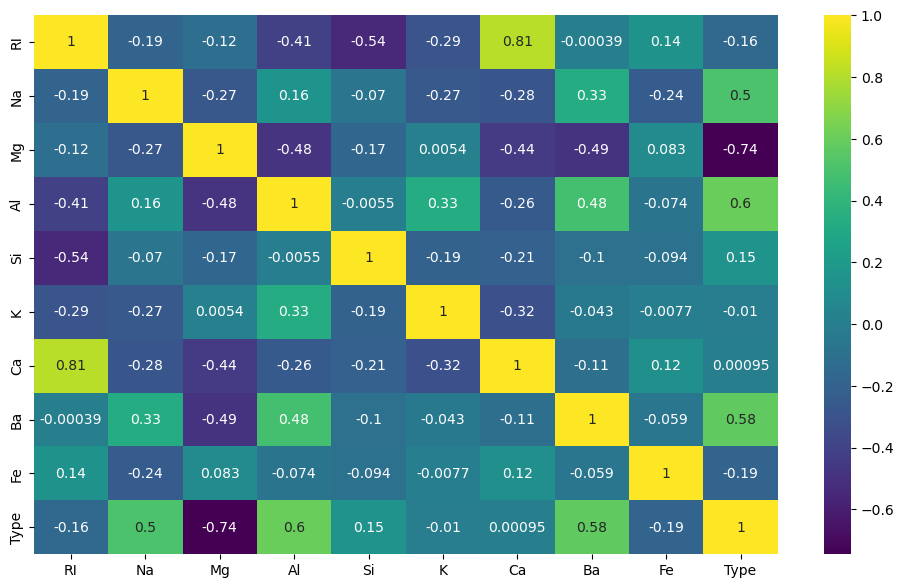

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(data=glass_data.corr(),annot=True,cmap='viridis')
plt.show()

### Split the data into input & output feature

In [15]:
x=glass_data.drop('Type',axis='columns')
y=glass_data[['Type']]

### Standardize the input features

In [16]:
std_scaler=StandardScaler()
x_scaled=std_scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


### Model Building

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=25)

In [18]:
x_train.shape,y_train.shape

((171, 9), (171, 1))

In [19]:
x_test.shape,y_test.shape

((43, 9), (43, 1))

### Model Training

In [20]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Model Testing || Model Evaluation

In [21]:
y_pred=knn_model.predict(x_train)

In [22]:
print('Accuracy Score       :',accuracy_score(y_train,y_pred))

Accuracy Score       : 0.8245614035087719


In [23]:
#Cross Validation Score
container_cv_score= []
for i in range(1,215,2):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    cv_scores=cross_val_score(estimator=knn_model,X=x_scaled,y=y,cv=5)
    container_cv_score.append(cv_scores.mean())
df=pd.DataFrame(container_cv_score)
df.head(50)

,0
0,0.621262
1,0.649834
2,0.649723
3,0.621595
4,0.616944
5,0.598228
6,0.598228
7,0.570321
8,0.584385
9,0.589037


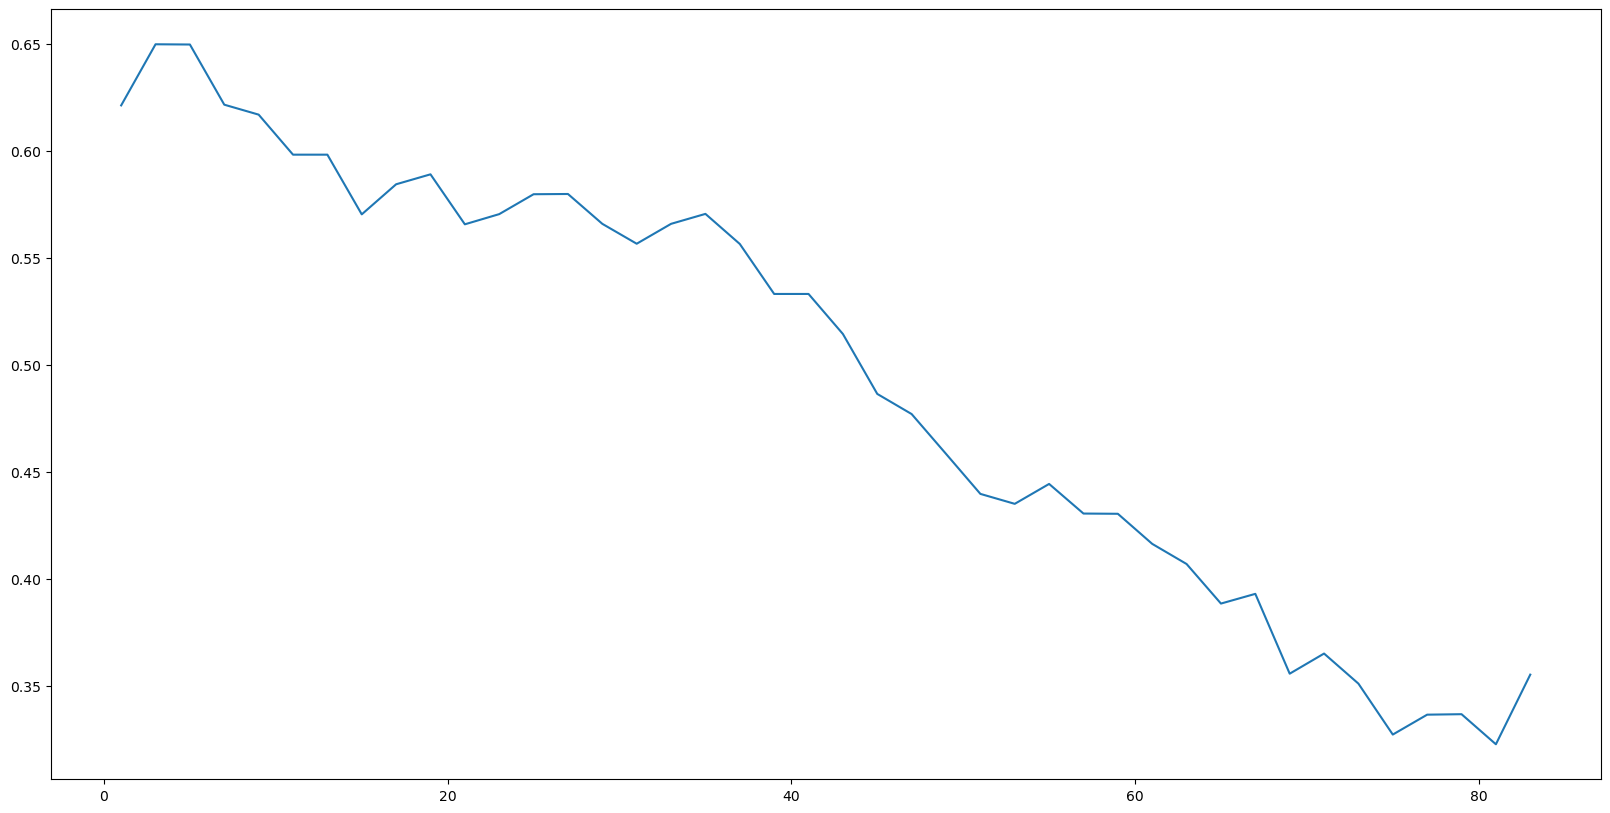

In [24]:
plt.figure(figsize=(20,10))
plt.plot(range(1,215,2),container_cv_score)
plt.show()

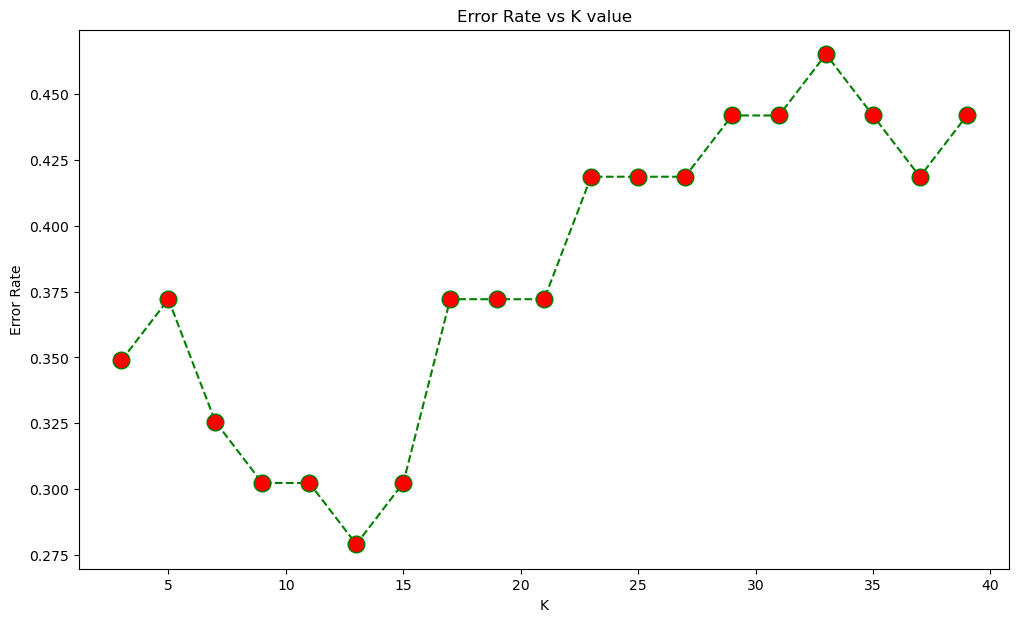

In [25]:
error_rate=[]
k_range=[i for i in range(3,40,2)]

for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i= knn.predict(x_test)
    pred_i=pred_i.reshape(43,1)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,7))
plt.plot(k_range,error_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='red',markersize='12')
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

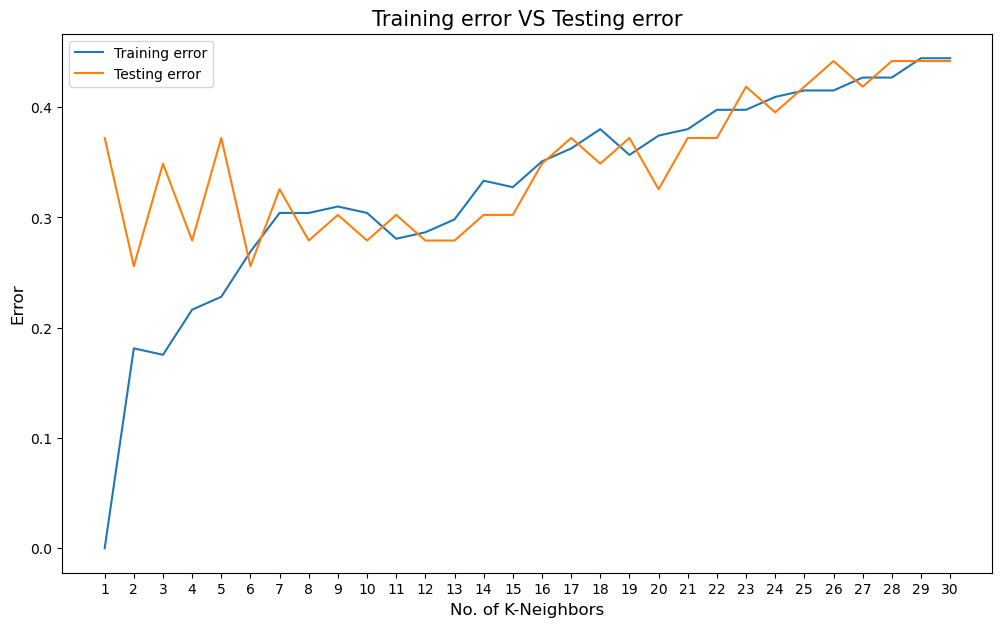

In [26]:
error1=[]
error2=[]
k_range = [i for i in range(1,31)]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1=knn.predict(x_train)
    y_pred1=y_pred1.reshape(171,1)
    error1.append(np.mean(y_train != y_pred1))
    y_pred2=knn.predict(x_test)
    y_pred2=y_pred2.reshape(43,1)
    error2.append(np.mean(y_test != y_pred2))

plt.figure(figsize=(12,7))
plt.plot(k_range,error1,label= 'Training error')
plt.plot(k_range,error2,label= 'Testing error')
plt.legend()
plt.title('Training error VS Testing error',fontsize=15)
plt.xlabel('No. of K-Neighbors',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.xticks(k_range)
plt.show()

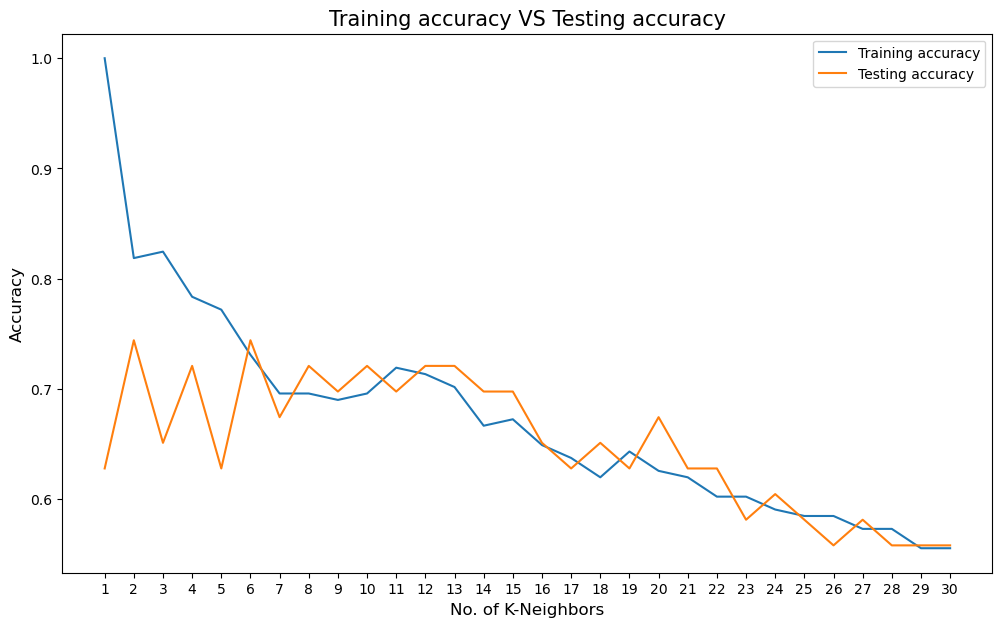

In [27]:
training_accuracy=[]
testing_accuracy=[]
k_range = [i for i in range(1,31)]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))
 

plt.figure(figsize=(12,7))
plt.plot(k_range,training_accuracy,label= 'Training accuracy')
plt.plot(k_range,testing_accuracy,label= 'Testing accuracy')
plt.legend()
plt.title('Training accuracy VS Testing accuracy',fontsize=15)
plt.xlabel('No. of K-Neighbors',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.xticks(k_range)
plt.show()

#### Applying KNN using K=3

In [28]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred=knn_model.predict(x_train)

In [30]:
print('Accuracy Score       :',accuracy_score(y_train,y_pred))
print('\n')
print('Confusion_matrix :',confusion_matrix(y_train,y_pred))
print('\n')
print('Classification_report :',classification_report(y_train,y_pred))

Accuracy Score       : 0.8245614035087719


Confusion_matrix : [[52  5  1  0  0  0]
 [ 6 49  1  1  0  0]
 [ 8  0  8  0  0  0]
 [ 0  2  0  8  0  1]
 [ 0  1  0  0  4  1]
 [ 2  1  0  0  0 20]]


Classification_report :               precision    recall  f1-score   support

           1       0.76      0.90      0.83        58
           2       0.84      0.86      0.85        57
           3       0.80      0.50      0.62        16
           5       0.89      0.73      0.80        11
           6       1.00      0.67      0.80         6
           7       0.91      0.87      0.89        23

    accuracy                           0.82       171
   macro avg       0.87      0.75      0.80       171
weighted avg       0.83      0.82      0.82       171



#### Applying KNN using K=5

In [31]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred=knn_model.predict(x_train)

In [33]:
print('Accuracy Score       :',accuracy_score(y_train,y_pred))
print('\n')
print('Confusion_matrix :',confusion_matrix(y_train,y_pred))
print('\n')
print('Classification_report :',classification_report(y_train,y_pred))

Accuracy Score       : 0.7719298245614035


Confusion_matrix : [[50  7  1  0  0  0]
 [ 9 48  0  0  0  0]
 [ 8  4  4  0  0  0]
 [ 0  4  0  6  0  1]
 [ 0  1  0  0  5  0]
 [ 2  1  0  1  0 19]]


Classification_report :               precision    recall  f1-score   support

           1       0.72      0.86      0.79        58
           2       0.74      0.84      0.79        57
           3       0.80      0.25      0.38        16
           5       0.86      0.55      0.67        11
           6       1.00      0.83      0.91         6
           7       0.95      0.83      0.88        23

    accuracy                           0.77       171
   macro avg       0.85      0.69      0.74       171
weighted avg       0.78      0.77      0.76       171



#### Applying KNN using K=7

In [34]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [35]:
y_pred=knn_model.predict(x_train)

In [36]:
print('Accuracy Score       :',accuracy_score(y_train,y_pred))
print('\n')
print('Confusion_matrix :',confusion_matrix(y_train,y_pred))
print('\n')
print('Classification_report :',classification_report(y_train,y_pred))

Accuracy Score       : 0.695906432748538


Confusion_matrix : [[48  9  1  0  0  0]
 [11 44  0  2  0  0]
 [11  3  2  0  0  0]
 [ 0  4  0  6  0  1]
 [ 2  1  0  0  2  1]
 [ 3  2  0  0  1 17]]


Classification_report :               precision    recall  f1-score   support

           1       0.64      0.83      0.72        58
           2       0.70      0.77      0.73        57
           3       0.67      0.12      0.21        16
           5       0.75      0.55      0.63        11
           6       0.67      0.33      0.44         6
           7       0.89      0.74      0.81        23

    accuracy                           0.70       171
   macro avg       0.72      0.56      0.59       171
weighted avg       0.70      0.70      0.67       171



##### CONCLUSION:

### Optimal k value for  the KNN algorithm  is 3,which gives good accuracy